Tak jak rozmawialiśmy to jest jedynie bardzo początkowe przejrzenie tych metod (dalej tej Doc2Vec wygląda dość dziwnie), ale przynajmniej wstępne wyniki wyglądają jakby miało to jakiekolwiek szanse zadziałać :D

In [13]:
import sys
sys.path.append('../')
from src.graph2vec import OurGraph2Vec
from ipynb.fs.full.github_stargazers import read_stargazers_dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
without=OurGraph2Vec(window_size=0)

In [6]:
graphs,labels=read_stargazers_dataset("../datasets/github_stargazers")

In [7]:
without.fit(graphs)

In [8]:
with_dm=OurGraph2Vec(cbowlike=True)

In [9]:
with_dm.fit(graphs)

In [10]:
without.get_embedding().shape

(12725, 128)

In [11]:
with_dm.get_embedding().shape

(12725, 128)

In [16]:
labels.mean()

0.5350098231827112

In [75]:
def create_logreg_model(embedding, get_pred=False):
    X_train, X_test, y_train, y_test=train_test_split(embedding,labels,test_size=0.3)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    if get_pred:
        return model.predict_proba(X_test),y_test
    return 1-(np.abs(model.predict(X_test)-y_test)).mean()

In [72]:
create_logreg_model(without.get_embedding())

0.5908852802514406

In [73]:
create_logreg_model(with_dm.get_embedding())

0.5929806181246726

In [74]:
create_logreg_model(with_dm.get_embedding()+without.get_embedding())

0.5982189628077528

In [84]:
n=1000
without_res=[0]*n
with_res=[0]*n
combined_res=[0]*n
for it in range(n):
    without_res[it]=create_logreg_model(without.get_embedding())
    with_res[it]=create_logreg_model(with_dm.get_embedding())
    combined_res[it]=create_logreg_model(with_dm.get_embedding()+without.get_embedding())

In [78]:
import seaborn as sns
import pandas as pd

<AxesSubplot:>

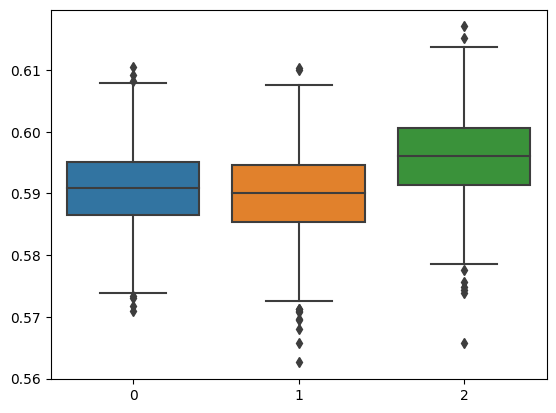

In [86]:
sns.boxplot([without_res,with_res,combined_res])#,labels=["Skipgram","CBOW","Combined"])